# Pretrained embedding

By cutting off the last layer of the network, we can obtain a feature vector (also *embedding*, *descriptor* or *high-level representation*) of the input image.

## Compose a set of gallery and query images

In [1]:
from lib.soda_dataset import get_gallery_and_queries

gallery, queries, gallery_labels, query_labels = get_gallery_and_queries()

## Calculate similarity matrix using query and gallery embeddings

We compute the [cosine similarity score](https://en.wikipedia.org/wiki/Cosine_similarity) between each gallery embedding and each query embedding, which is the **cosine of the angle between the embeddings**. When embeddings are **the same**, the angle between them will be zero and the cosine of the angle will be **1**. **Perpendicular** embeddings have a cosine similarity of **0** and **opposite** embeddings have a cosine similarity of **-1**.

When the embeddings are already normalized, computing the cosine similarity boils down to a **matrix multiplication** of the matrix formed by the gallery embeddings and the matrix formed by the query embeddings.

Note that for normalized embeddings, sorting pairs of embeddings from smallest to largest distance will yield the same ranking as sorting them for largest to smallest cosine similarity score. However, computing the distance requires more computations and can easily be **five times slower**, as we can see below. Hence, we prefer to use cosine similarity.

In [2]:
from lib.metric_learning import match_pretrained_embeddings

sim_mat = match_pretrained_embeddings(gallery, queries)

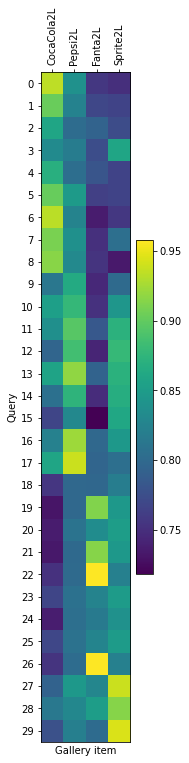

In [3]:
from lib.plots import plot_sim_mat

plot_sim_mat(sim_mat, gallery_labels)

# Evaluate the results

See [2_evaluation_metrics.ipynb](./2_evaluation_metrics.ipynb) for more details.

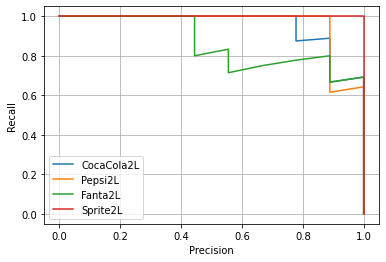

In [4]:
from lib.plots import plot_pr_curves

plot_pr_curves(sim_mat, gallery_labels, query_labels)

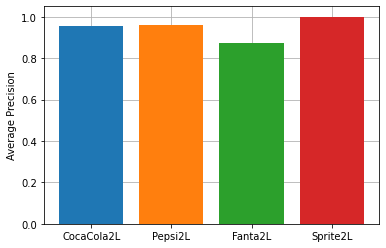

In [5]:
from lib.plots import plot_aps

plot_aps(sim_mat, gallery_labels, query_labels)